<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-AI_programming/boston_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 보스턴 집값 데이터셋

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [25]:
import torch
import torch.optim as optim
import torch.nn.init as init

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## 데이터 불러오기
### 레코드 수: 506개
### 필드 개수: 14개

- CRIM: 인구 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지의 비율
- INDUS: 비소매상업지역이 점유하고 있는 토지의 비율
- CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 10ppm 당 농축 일산화질소
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 5개의 보스턴 직업센터까지의 접근성 지수
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000 달러 당 재산세율
- PTRATIO: 자치시(town)별 학생/교사 비율
- B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
- LSTAT: 모집단의 하위계층의 비율(%)
- MEDV: 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 변수 분리
집값을 예측하는 데이터셋이므로, 주택 가격인 MEDV를 목표 변수 Y로 놓고 분리.

In [7]:
X = df.drop(columns='MEDV')
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
Y = df[['MEDV']]
Y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# 데이터 시각화
### (1) 분산 확인

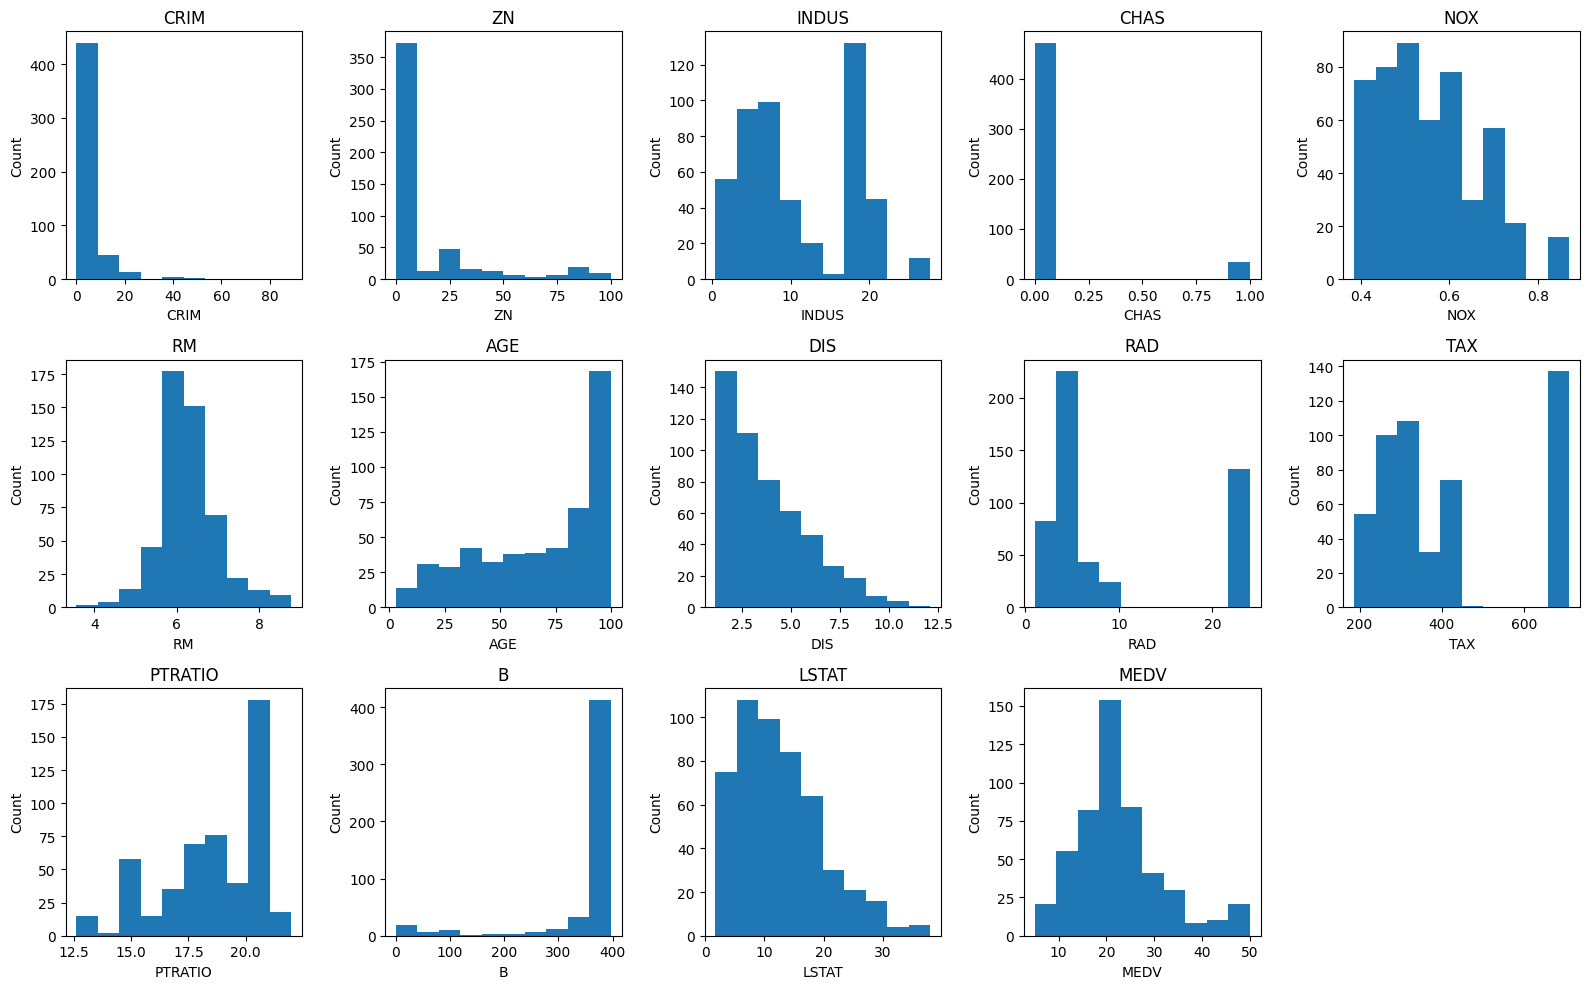

In [9]:
fig=plt.figure(figsize=(16,10))
for i in range(len(df.columns)):
  plt.subplot(3, 5, i+1)
  plt.hist(df[[df.columns[i]]])
  plt.title(df.columns[i])
  plt.xlabel(df.columns[i])
  plt.ylabel('Count')

plt.tight_layout()
plt.show()

### (2) MEDV 필드와 관계 확인

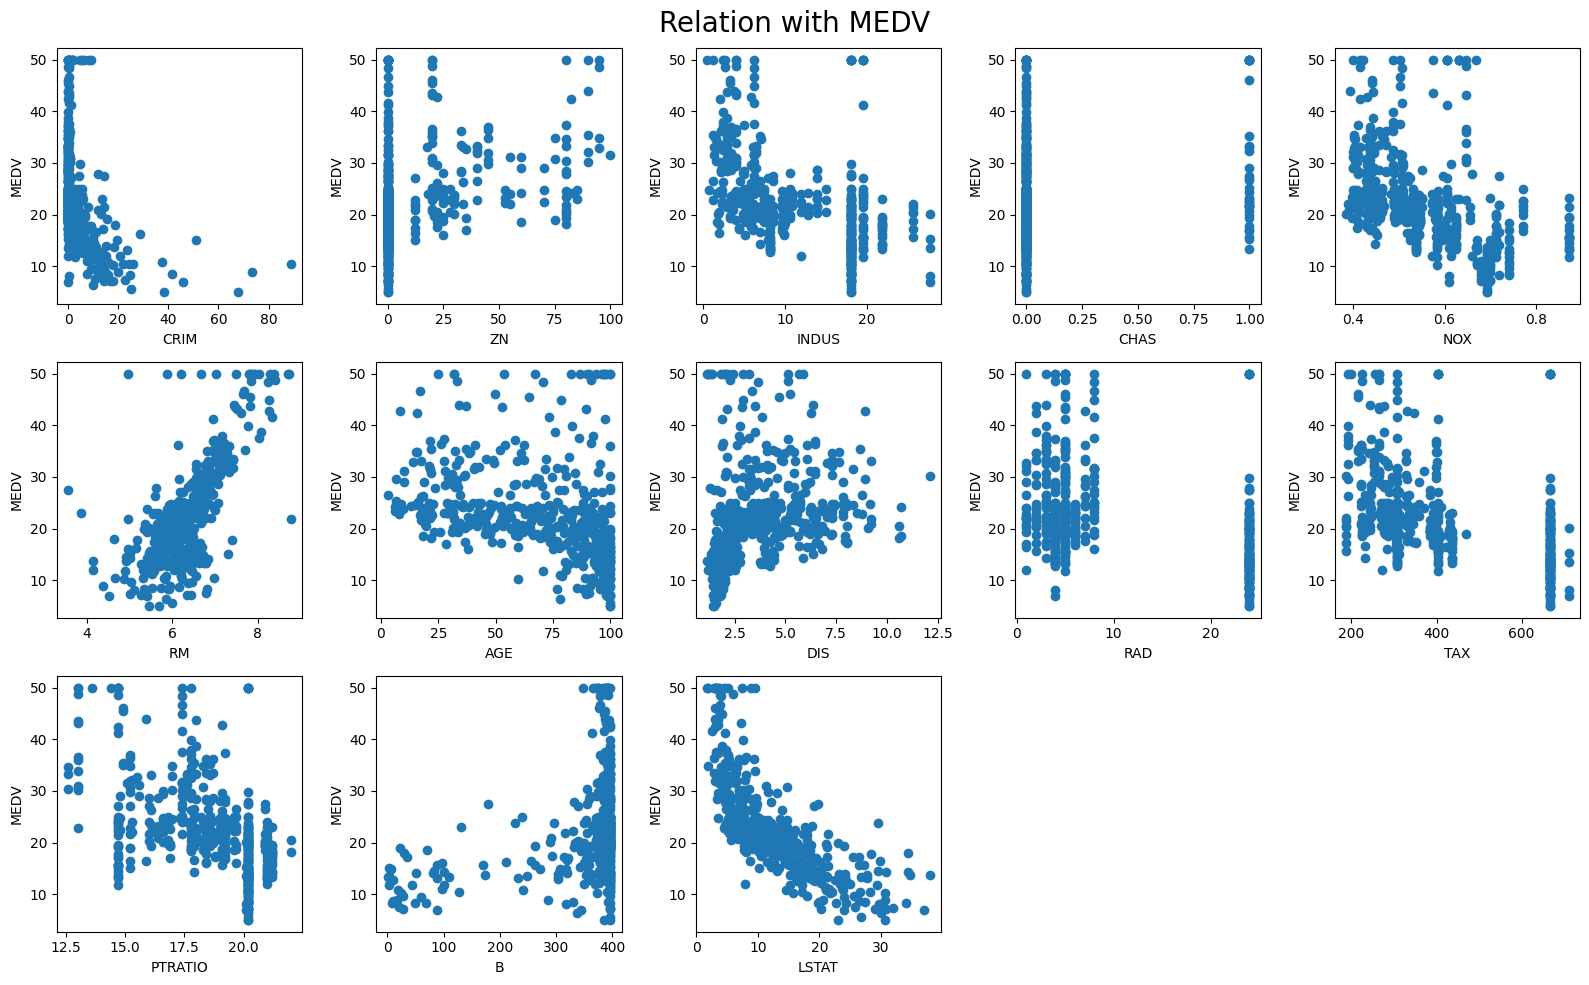

In [10]:
fig=plt.figure(figsize=(16,10))
plt.suptitle('Relation with MEDV', fontsize=20)

for i in range(len(df.columns)-1):
  plt.subplot(3, 5, i+1)
  plt.scatter(df[[df.columns[i]]], df[[df.columns[-1]]])
  plt.xlabel(df.columns[i])
  plt.ylabel('MEDV')


plt.tight_layout()
plt.show()

### (3) Heatmap으로 상관관계 파악

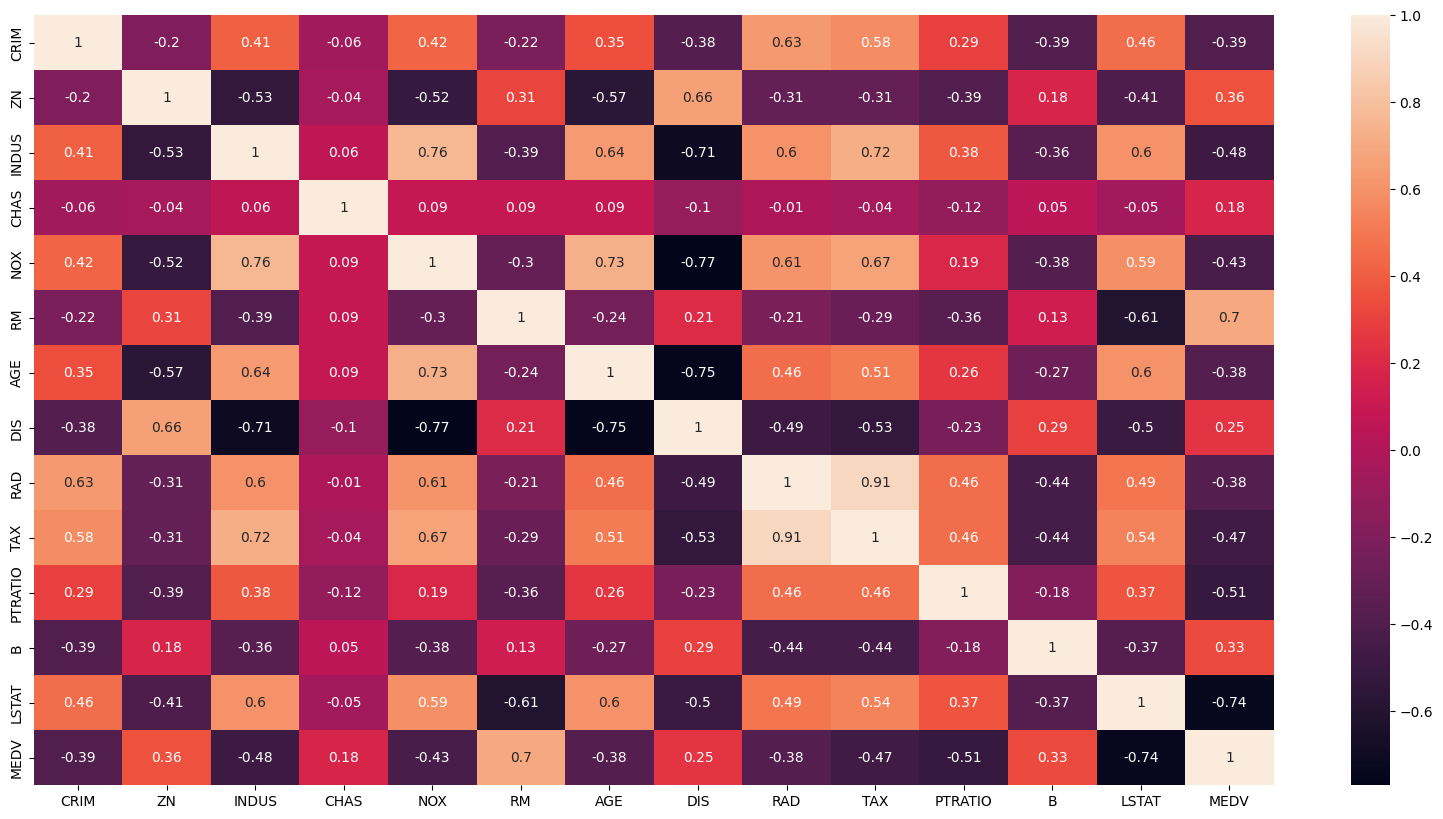

In [11]:
# 상관관계 행렬 생성
# 소수점 둘째 자리까지만 표시
correlation_matrix = df.corr().round(2)

# 이미지 크기 지정
plt.figure(figsize=(20,10))

# 상관관계 행렬 표시
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

# 학습에 사용할 데이터 추출

In [30]:
# 상관관계가 0.4 이상인 column 추출
corr = df.corr()
data = corr['MEDV'][abs(corr['MEDV'])>0.4]
train_df = df[data.index.drop(['MEDV'])]
x = torch.FloatTensor(train_df.to_numpy())
y = torch.FloatTensor(Y.to_numpy())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# 다중 선형 회귀 선언 및 학습

In [31]:
def weight_bias_reset():
  W = torch.zeros([6,1], requires_grad = True)
  b = torch.zeros(1, requires_grad = True)
  return W, b

W, b = weight_bias_reset()
print(x_train.shape, y_train.shape, W.shape)
print(x_test.shape, y_test.shape)

torch.Size([404, 6]) torch.Size([404, 1]) torch.Size([6, 1])
torch.Size([102, 6]) torch.Size([102, 1])


In [32]:
optimizer = optim.Adam([W, b], lr = 0.1)
num_epochs = 2000

print('< Before Train >')

results = []
history = []
def learning(optimizer, lr, num_epochs, W, b, opt):
  print('learning rate = ', lr)
  print('W = ', W)
  print('b =', b)
  for epoch in range(num_epochs):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    history.append(cost.item())
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if opt == 0:
      if epoch % 50 == 0 or epoch == num_epochs-1:
        print('Epoch: %d , Cost: %f' %(epoch, cost))
    else:
      if epoch == 0 or epoch == num_epochs-1:
        print('Epoch: %d , Cost: %f' %(epoch, cost))

  print('\n')
  results.append(cost.item())

learning(optimizer, 0.01, num_epochs, W, b, 0)

< Before Train >
learning rate =  0.01
W =  tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)
b = tensor([0.], requires_grad=True)
Epoch: 0 , Cost: 606.555420
Epoch: 50 , Cost: 57.893158
Epoch: 100 , Cost: 45.299118
Epoch: 150 , Cost: 41.003799
Epoch: 200 , Cost: 37.452503
Epoch: 250 , Cost: 34.487904
Epoch: 300 , Cost: 32.172203
Epoch: 350 , Cost: 30.465628
Epoch: 400 , Cost: 29.271078
Epoch: 450 , Cost: 28.473343
Epoch: 500 , Cost: 27.963316
Epoch: 550 , Cost: 27.650120
Epoch: 600 , Cost: 27.464642
Epoch: 650 , Cost: 27.358027
Epoch: 700 , Cost: 27.297836
Epoch: 750 , Cost: 27.263744
Epoch: 800 , Cost: 27.243643
Epoch: 850 , Cost: 27.230705
Epoch: 900 , Cost: 27.221228
Epoch: 950 , Cost: 27.213331
Epoch: 1000 , Cost: 27.206083
Epoch: 1050 , Cost: 27.199064
Epoch: 1100 , Cost: 27.192087
Epoch: 1150 , Cost: 27.185074
Epoch: 1200 , Cost: 27.178003
Epoch: 1250 , Cost: 27.323528
Epoch: 1300 , Cost: 28.120327
Epoch: 1350 , Cost: 27.162

# Test Score

In [33]:
predict = x_test.matmul(W) + b
print("Test MSE: ", torch.mean((predict - y_test) ** 2).item())
print("R2 score: ", r2_score(y_test, predict.detach().numpy()))

Test MSE:  29.043432235717773
R2 score:  0.6039556743724952
